In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import Warnings Library
import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s'
)


In [2]:
# Loading Dataset from Github
def load_data():   
    url = 'https://raw.githubusercontent.com/mukeshmagar543/EnE_TitanicModelBuilding/refs/heads/main/research/titanic_train.csv'
    data = pd.read_csv(url)
    return data
df = load_data()

In [3]:
df.sample(frac= 1) # Shuffling the DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
...,...,...,...,...,...,...,...,...,...,...,...,...
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.2250,NaN,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns= ['Cabin','PassengerId', 'Name', 'Ticket'], axis= 1, inplace= True) # Dropping Cabin column as it has a lot of missing values


In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<Axes: >

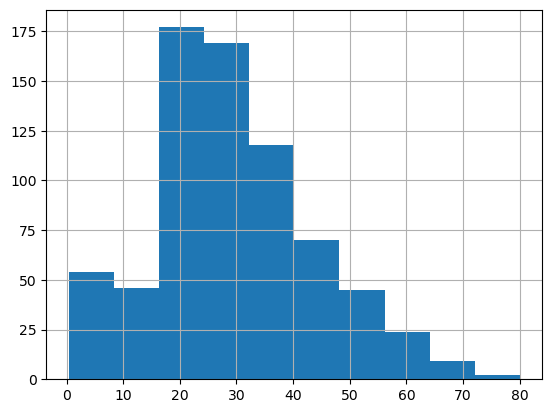

In [8]:
df.Age.hist()

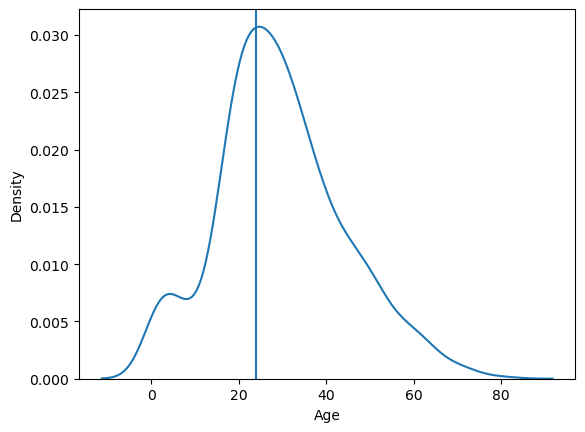

In [9]:
sns.kdeplot(df, x = 'Age')
plt.axvline(24)


In [10]:
# Filter for rows where 'Embarked' is missing (i.e. NaN)
not_boarded = df[df['Embarked'].isnull()]

# Display the rows with missing embarkation data
print(not_boarded)


     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN


In [11]:
print(not_boarded[['Pclass', 'Fare']])


     Pclass  Fare
61        1  80.0
829       1  80.0


In [12]:
# This will include NaN in the count
embarked_counts = df['Embarked'].value_counts(dropna=False)
print(embarked_counts)


Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [13]:
# Group the data by 'Embarked' and calculate the average fare for each group
average_fare = df.groupby('Embarked')['Fare'].mean()

# Display the results
print(average_fare)


Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


In [14]:
# Filter for passengers in Pclass 1
pclass1 = df[df['Pclass'] == 1]

# Group by 'Embarked' and get min and max fare
fare_range_pclass1 = pclass1.groupby('Embarked')['Fare'].agg(['min', 'max'])
print(fare_range_pclass1)


            min       max
Embarked                 
C         26.55  512.3292
Q         90.00   90.0000
S          0.00  263.0000


In [15]:
# Function to get the most frequent fare (mode) for a group
def get_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Group by 'Embarked' and apply the mode function on 'Fare'
most_common_fare = df.groupby('Embarked')['Fare'].apply(get_mode)
print(most_common_fare)



Embarked
C    7.2292
Q    7.7500
S    8.0500
Name: Fare, dtype: float64


In [16]:
# Fill missing 'Embarked' values
df['Embarked'].fillna('S', inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [ ]:
# Fill missing Age values with (24) by the help of kdeplot and axvline
df['Age'].fillna(24, inplace=True)

In [19]:
df['Sex'] = df['Sex'].replace({'male' : 0 , 'female' : 1 })

In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
# Checking the Target column is balanced or Unbalanced
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2
887,1,1,1,19.0,0,0,30.0000,2
888,0,3,1,24.0,1,2,23.4500,2
889,1,1,0,26.0,0,0,30.0000,0


In [27]:
df = df.drop(columns= ['Embarked', 'Parch', 'SibSp', 'Pclass'])

In [31]:
X = df.drop(columns ='Survived') # Dependant Columns
y = df['Survived'] # Target Column

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state= 42)

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Balancing Target Column
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train,y_train = sm.fit_resample(X_train,y_train)


In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report

accuracy_score_RF = accuracy_score(y_test,y_pred_RF)

accuracy_score_RF

0.7873134328358209

In [41]:
from sklearn.model_selection import GridSearchCV

# model = RandomForestClassifier()
# param_grid = {'n_estimators' : [100,200,300,400,500,600,700], 'max_depth': [None,100,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]}

# # Grid SearchCV
# grid_search = GridSearchCV(model, param_grid, cv=3)
# grid_search.fit(X_train, y_train)

# # Best Model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Print Results
# print('Best Parameters :' , grid_search.best_params_)
# print('Accuracy:', accuracy_score(y_test, y_pred))


# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Adjusted hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 50, 100],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Configure GridSearchCV with parallel processing
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Execute grid search
grid_search.fit(X_train, y_train)

# Retrieve best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7947761194029851

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.71      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize decision tree with reproducibility
model = DecisionTreeClassifier(random_state=42)

# Optimized parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Configure grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# Execute search
grid_search.fit(X_train, y_train)

# Get best model
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

# Evaluate performance
print('Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.7611940298507462

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.73      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

